In [19]:
#scaling constants
B_b   = 1e1
b_B   = 1/B_b
G_1   = 1e9
one_G = 1/G_1
G_K   = 1e6
K_G   = 1/G_K
G_M   = 1e3
M_G   = 1/G_M
K_1   = 1e3
one_K = 1/K_1
M_1   = 1e6
one_M = 1/M_1
m_1   = 1e-3
one_m = 1/m_1
m_u   = 1e3 
u_m   = 1/m_u
u_1   = 1e-6
one_u = 1/u_1
n_1   = 1e-9
one_n = 1/n_1
n_m   = 1e-6
m_n   = 1/n_m

sz1K  = 1024
sz1M  = sz1K*sz1K
sz1G  = sz1M*sz1K


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import re
from datetime import datetime

sns.set(style="darkgrid")

# Compute statistical moments: mean, std, skewness, kurtosis
def compute_moments(series):
    values = series.dropna()
    return {
        'count': len(values),
        'mean': values.mean(),
        'std': values.std(),
        'skew': skew(values),
        'kurtosis': kurtosis(values)
    }

# Load the log file into a list of lines
def load_log_file(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    return [line.strip() for line in lines if line.strip()]


In [21]:
# Replace this with the actual path to your log file
log_path = "sim_log.txt"

# Load and inspect
lines = load_log_file(log_path)
print(f"Loaded {len(lines)} lines from the log.")


Loaded 2982 lines from the log.


📊 Sender Estimated Frame Rate Statistics:
count: 100.000
mean: 33.322
std: 0.598
skew: -1.592
kurtosis: 4.465


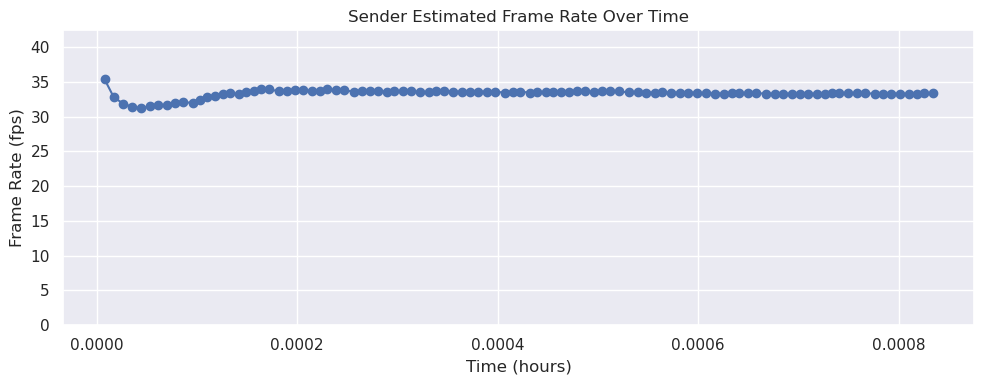

In [22]:
# Extract lines with frame rate information
#frame_rate_lines = [line for line in lines if "Sender estimated frame rate is" in line]
frame_rate_lines = [line for line in lines if "[simulate_stream:] Estimated frame rate (Hz): " in line]

# Parse frame rate values from lines
frame_rates = []
timestamps = []
for line in frame_rate_lines:
    match = re.search(r"\[simulate_stream:\] Estimated frame rate \(Hz\): ([\d.]+)", line)
    if match:
        value = float(match.group(1))
        frame_rates.append(value)
        # Optional: extract timestamp if available at the beginning of the line
        ts_match = re.match(r"([\d.]+)", line)
        timestamps.append(ts_match.group(1) if ts_match else None)
    else:
        print("No match")

# Create a DataFrame
frame_rate_df = pd.DataFrame({
#    'timestamp': pd.to_datetime(timestamps, errors='coerce'),
    'timestamp': timestamps,
    'frame_rate': frame_rates
})

# Display statistics
frame_rate_stats = compute_moments(frame_rate_df['frame_rate'])

# Convert microseconds to hours
frame_rate_df['hours'] = frame_rate_df['timestamp'].astype(float) / 3_600_000_000  # 1 hour = 3.6e9 µs

print("📊 Sender Estimated Frame Rate Statistics:")
for k, v in frame_rate_stats.items():
    print(f"{k}: {v:.3f}")
# Plot
plt.figure(figsize=(10, 4))
plt.plot(frame_rate_df['hours'], frame_rate_df['frame_rate'], marker='o', linestyle='-')

plt.title('Sender Estimated Frame Rate Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Frame Rate (fps)')
plt.ylim(0, max(frame_rate_df['frame_rate']) * 1.2)  # Give headroom
plt.grid(True)

plt.tight_layout()
plt.show()


📊 Sender Bit Rate Statistics (Mbps):
count: 100.000
mean: 19.993
std: 0.359
skew: -1.592
kurtosis: 4.465


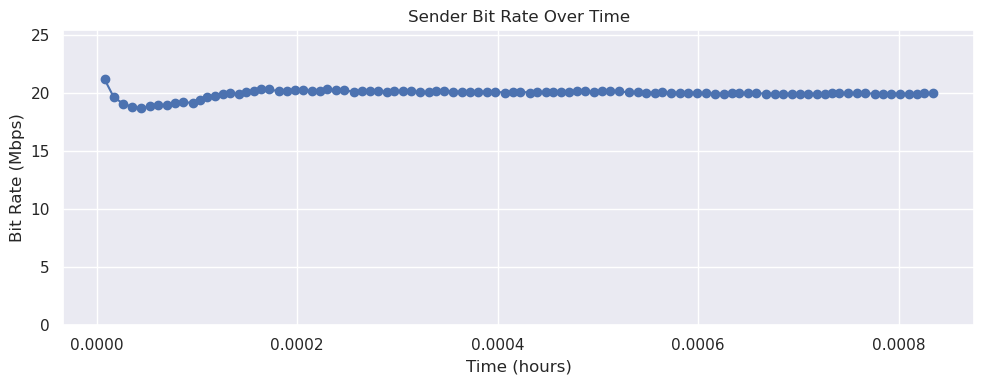

In [23]:
# Extract lines with bit rate information
bit_rate_lines = [line for line in lines if "[simulate_stream:] Estimated bit rate (MHz):" in line]

# Parse bit rate values and timestamps
bit_rates = []
timestamps = []
for line in bit_rate_lines:
    match = re.search(r"\[simulate_stream:\] Estimated bit rate \(MHz\): ([\d.]+)", line)
    if match:
        value = float(match.group(1))
        bit_rates.append(value)
        ts_match = re.match(r"([\d.]+)", line)
        timestamps.append(ts_match.group(1) if ts_match else None)
    else:
        print("No match in bit rate line:", line)

# Create a DataFrame
bit_rate_df = pd.DataFrame({
    'timestamp': timestamps,
    'bit_rate': bit_rates
})

# Convert microseconds to hours
bit_rate_df['hours'] = bit_rate_df['timestamp'].astype(float) / 3_600_000_000

# Compute statistics
bit_rate_stats = compute_moments(bit_rate_df['bit_rate'])

# Display statistics
print("📊 Sender Bit Rate Statistics (Mbps):")

for k, v in bit_rate_stats.items():
    print(f"{k}: {v:.3f}")

# Plot
plt.figure(figsize=(10, 4))
plt.plot(bit_rate_df['hours'], bit_rate_df['bit_rate'], marker='o', linestyle='-')
plt.title('Sender Bit Rate Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Bit Rate (Mbps)')
plt.ylim(0, max(bit_rate_df['bit_rate']) * 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Sender Frame Size Statistics (kB):
count: 100.000
mean: 60.036
std: 5.468
skew: 0.103
kurtosis: -0.193


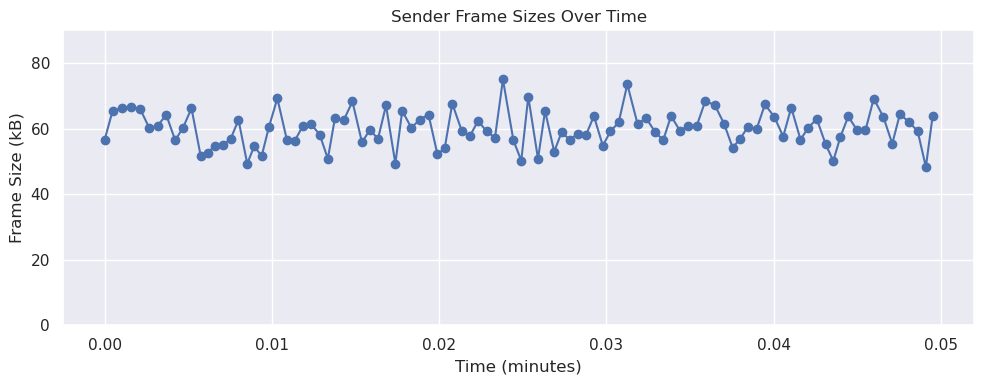

In [47]:
# Extract lines with bit rate information
sent_frame_lines = [line for line in lines if "[simulate_stream:] Sending frame" in line]

# Parse bit rate values and timestamps
frame_sizes = []
timestamps = []
for line in sent_frame_lines:
    match = re.search(r"\[simulate_stream:\] Sending frame; size = ([\d.]+)", line)
    if match:
        value = float(match.group(1))
        frame_sizes.append(value*one_K*b_B)
        ts_match = re.match(r"([\d.]+)", line)
        timestamps.append(ts_match.group(1) if ts_match else None)
    else:
        print("No match in frame size line:", line)

# Create a DataFrame
frame_size_df = pd.DataFrame({
    'timestamp': timestamps,
    'frame_size': frame_sizes
})

# Convert microseconds to hours
frame_size_df['hours'] = frame_size_df['timestamp'].astype(float) / 3_600_000_000
# Convert microseconds to zero based minutes
frame_size_df['minutes'] = frame_size_df['hours']*60  #minutes

# Compute statistics
frame_size_stats = compute_moments(frame_size_df['frame_size'])

# Display statistics
print("📊 Sender Frame Size Statistics (kB):")

for k, v in frame_size_stats.items():
    print(f"{k}: {v:.3f}")

# Plot
plt.figure(figsize=(10, 4))
plt.plot(frame_size_df['minutes'], frame_size_df['frame_size'], marker='o', linestyle='-')
plt.title('Sender Frame Sizes Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frame Size (kB)')
plt.ylim(0, max(frame_size_df['frame_size']) * 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
frame_size_df.head(5)

,timestamp,frame_size,hours,minutes
0,0.0,56.6135,0.000000,0.000000
1,28306.0,65.3837,0.000008,0.000472
2,60997.0,66.2866,0.000017,0.001017
3,94140.0,66.5447,0.000026,0.001569
4,127412.0,65.9991,0.000035,0.002124


In [25]:
#determine simulation port range
port_lines = [line for line in lines if "Connecting to receiver tcp" in line]
#port_lines
x = []
for line in port_lines:
    match = re.search(r"cpu_sim ([\d.]+)", line)
    if match:
        value = float(match.group(1))
        x.append(value)
    else:
        print("No match in port line:", line)
#x
base_port = int(min(x))
hi_port   = int(max(x))
print(base_port)
print(hi_port)

6000
6002



🔧 Component 1 (Port 6000):
Component 1 Statistics (Hz):
count: 51.000
mean: 21.089
std: 1.060
skew: 1.263
kurtosis: 1.955


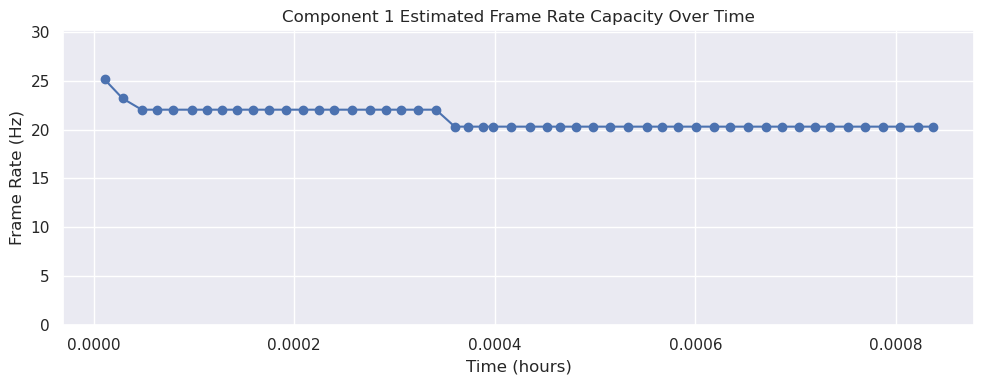


🔧 Component 2 (Port 6001):
Component 2 Statistics (Hz):
count: 50.000
mean: 19.026
std: 0.934
skew: 2.351
kurtosis: 4.612


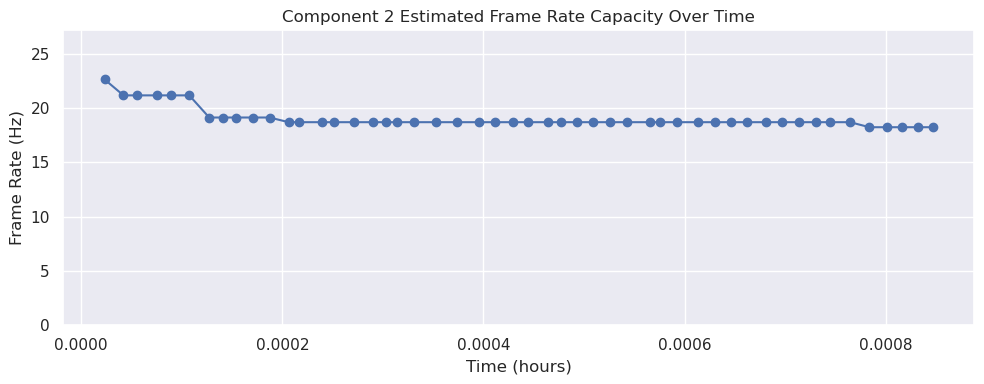


🔧 Component 3 (Port 6002):
Component 3 Statistics (Hz):
count: 48.000
mean: 19.926
std: 2.499
skew: 0.606
kurtosis: -1.017


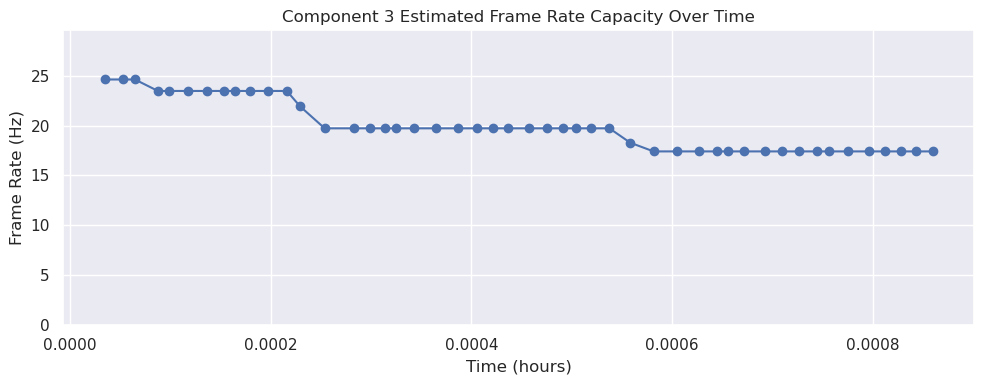

In [26]:
#base_port = 7000
#hi_port   = 7019
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    comp_lines = [line for line in lines if f"cpu_sim {i}" in line and "Measured frame rate" in line]
    # Parse frame rate values and timestamps
    frame_rates = []
    timestamps = []
    for line in comp_lines:
        match = re.search(r"Measured frame rate ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            frame_rates.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            timestamps.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in frame size line:", line)
    
    # Create a DataFrame
    frame_rate_df = pd.DataFrame({
        'timestamp': timestamps,
        'frame_rate': frame_rates
    })
    # Convert microseconds to hours
    frame_rate_df['hours'] = frame_rate_df['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    frame_rate_stats = compute_moments(frame_rate_df['frame_rate'])
    
    # Display statistics
    print(f"Component {component_id} Statistics (Hz):")
    
    for k, v in frame_rate_stats.items():
        print(f"{k}: {v:.3f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(frame_rate_df['hours'], frame_rate_df['frame_rate'], marker='o', linestyle='-')
    plt.title(f"Component {component_id} Estimated Frame Rate Capacity Over Time")
    plt.xlabel('Time (hours)')
    plt.ylabel('Frame Rate (Hz)')
    plt.ylim(0, max(frame_rate_df['frame_rate']) * 1.2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



🔧 Component 1 (Port 6000):
Component 1 Statistics (Hz):
count: 51.000
mean: 12.857
std: 1.169
skew: 0.208
kurtosis: -0.608


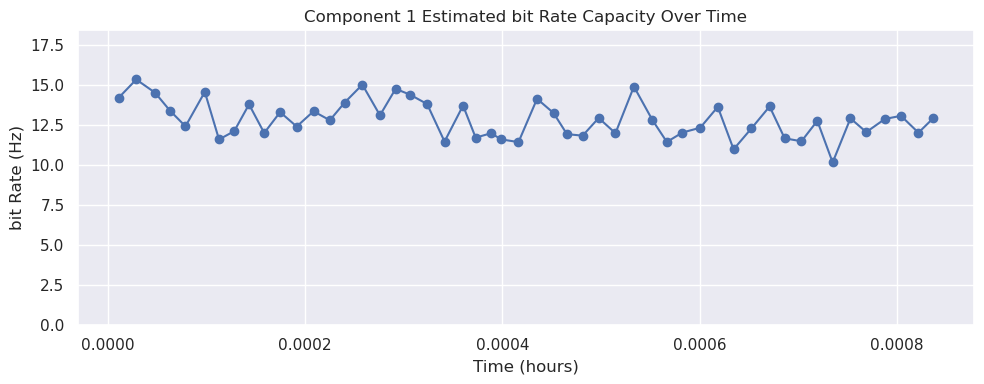


🔧 Component 2 (Port 6001):
Component 2 Statistics (Hz):
count: 50.000
mean: 12.396
std: 1.600
skew: 1.236
kurtosis: 2.493


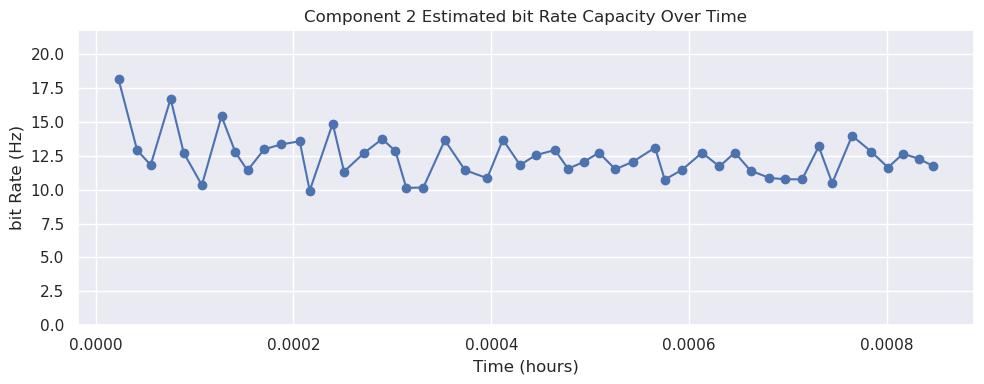


🔧 Component 3 (Port 6002):
Component 3 Statistics (Hz):
count: 48.000
mean: 12.894
std: 1.655
skew: 0.443
kurtosis: -0.427


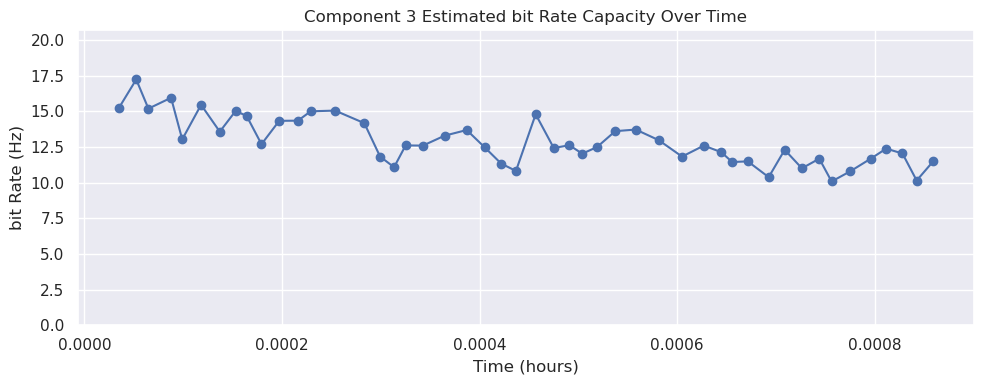

In [27]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    comp_lines = [line for line in lines if f"cpu_sim {i}" in line and "Measured bit rate" in line]
    # Parse bit rate values and timestamps
    bit_rates = []
    timestamps = []
    for line in comp_lines:
        match = re.search(r"Measured bit rate ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            bit_rates.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            timestamps.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in bit line:", line)
    
    # Create a DataFrame
    bit_rate_df = pd.DataFrame({
        'timestamp': timestamps,
        'bit_rate': bit_rates
    })
    # Convert microseconds to hours
    bit_rate_df['hours'] = bit_rate_df['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    bit_rate_stats = compute_moments(bit_rate_df['bit_rate'])
    
    # Display statistics
    print(f"Component {component_id} Statistics (Hz):")
    
    for k, v in bit_rate_stats.items():
        print(f"{k}: {v:.3f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(bit_rate_df['hours'], bit_rate_df['bit_rate'], marker='o', linestyle='-')
    plt.title(f"Component {component_id} Estimated bit Rate Capacity Over Time")
    plt.xlabel('Time (hours)')
    plt.ylabel('bit Rate (Hz)')
    plt.ylim(0, max(bit_rate_df['bit_rate']) * 1.2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



🔧 Component 1 (Port 6000):
Component 1 Statistics (Hz):
count: 51.000
mean: 38066.437
std: 4706.284
skew: 0.237
kurtosis: -0.483


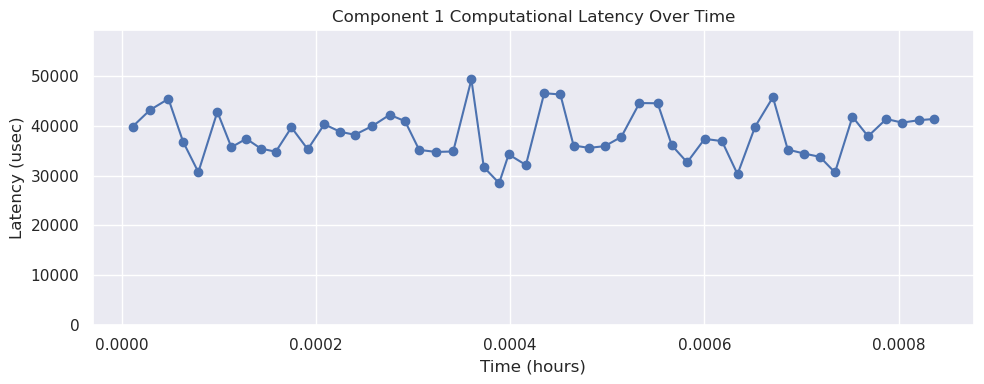


🔧 Component 2 (Port 6001):
Component 2 Statistics (Hz):
count: 50.000
mean: 41392.602
std: 7168.864
skew: -0.346
kurtosis: -0.498


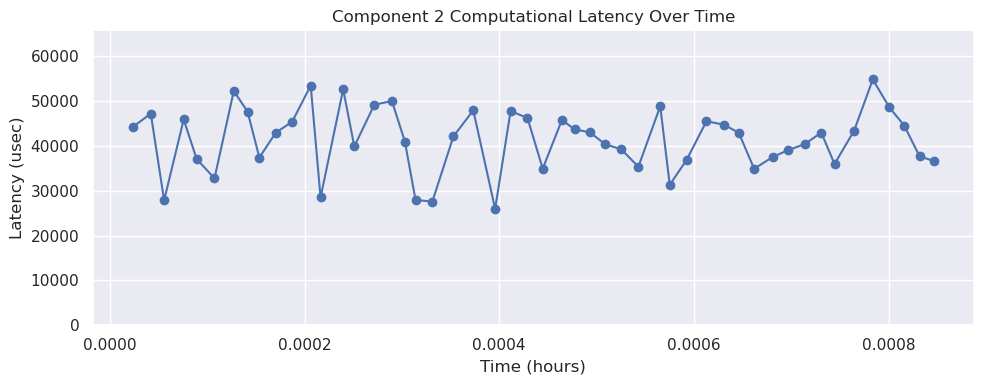


🔧 Component 3 (Port 6002):
Component 3 Statistics (Hz):
count: 48.000
mean: 41089.402
std: 6085.759
skew: 0.498
kurtosis: 0.127


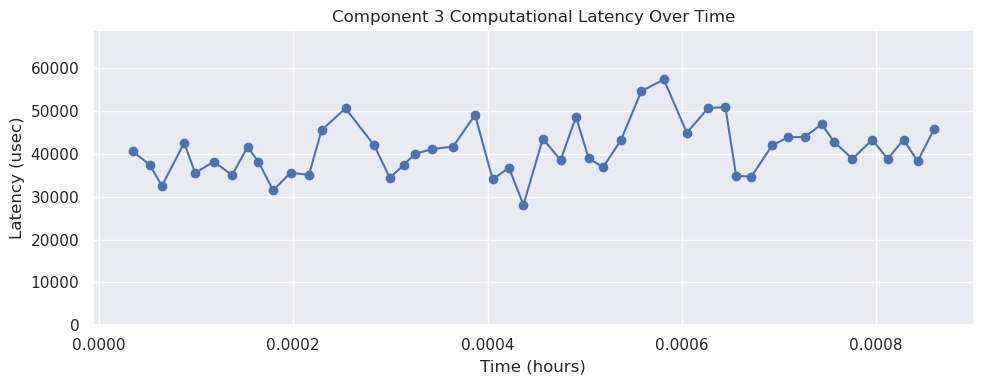

In [28]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    comp_lines = [line for line in lines if f"cpu_sim {i}" in line and "Computed latencies" in line]
    # Parse bit rate values and timestamps
    y = []
    x = []
    for line in comp_lines:
        match = re.search(r"tsc_uS = ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            y.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            x.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in latency line:", line)
    
    # Create a DataFrame
    latency = pd.DataFrame({
        'timestamp': x,
        'latency': y
    })
    # Convert microseconds to hours
    latency['hours'] = latency['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    latency_stats = compute_moments(latency['latency'])
    
    # Display statistics
    print(f"Component {component_id} Statistics (Hz):")
    
    for k, v in latency_stats.items():
        print(f"{k}: {v:.3f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(latency['hours'], latency['latency'], marker='o', linestyle='-')
    plt.title(f"Component {component_id} Computational Latency Over Time")
    plt.xlabel('Time (hours)')
    plt.ylabel('Latency (usec)')
    plt.ylim(0, max(latency['latency']) * 1.2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



🔧 Component 1 (Port 6000):
Component 1 Statistics (Hz):
count: 51.000
mean: 6.098
std: 0.492
skew: 0.132
kurtosis: -0.349


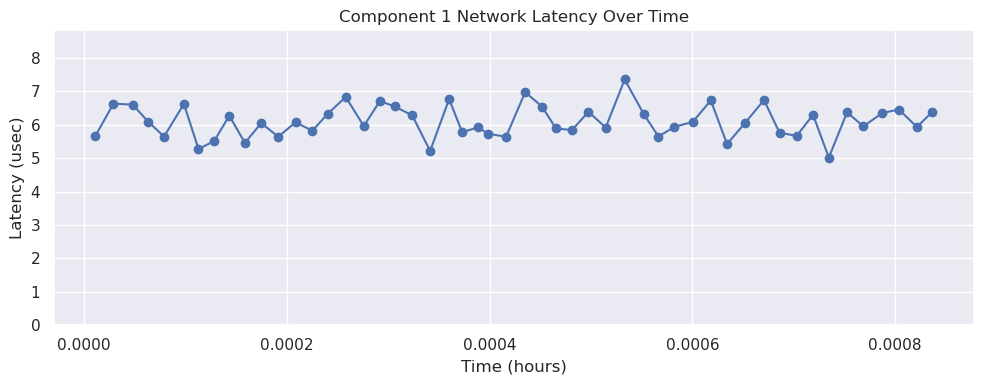


🔧 Component 2 (Port 6001):
Component 2 Statistics (Hz):
count: 50.000
mean: 6.514
std: 0.739
skew: 0.171
kurtosis: -0.432


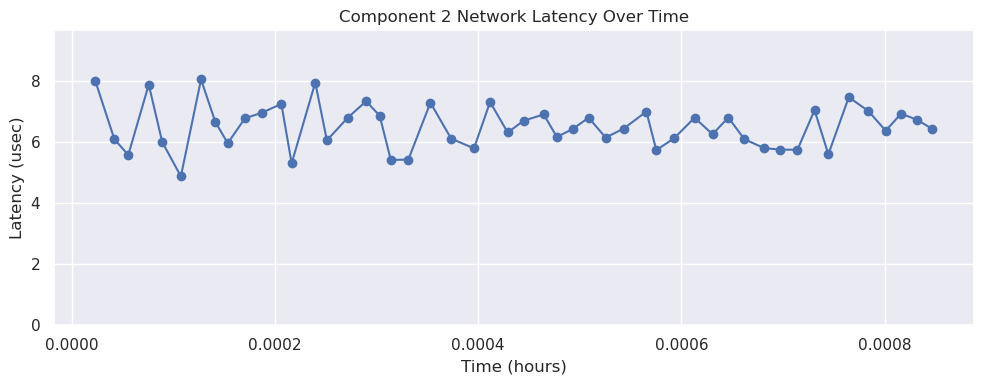


🔧 Component 3 (Port 6002):
Component 3 Statistics (Hz):
count: 48.000
mean: 6.492
std: 0.562
skew: 0.066
kurtosis: -0.671


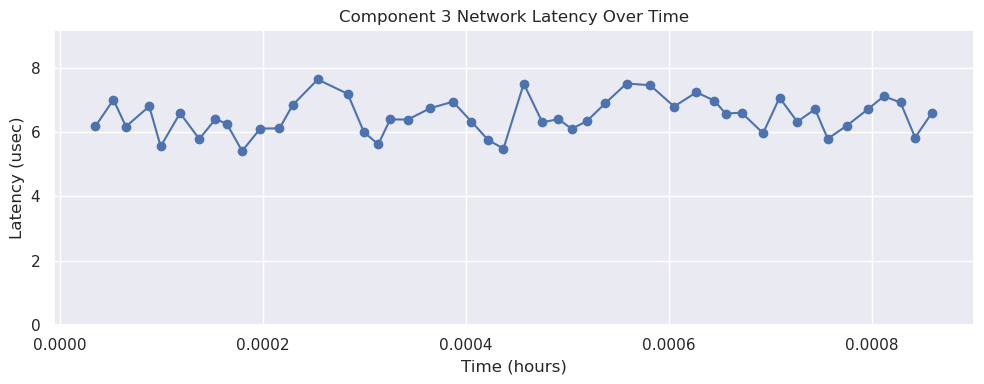

In [29]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    comp_lines = [line for line in lines if f"cpu_sim {i}" in line and "Computed latencies" in line]
    # Parse bit rate values and timestamps
    y = []
    x = []
    for line in comp_lines:
        match = re.search(r"tsn_uS = ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            y.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            x.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in latency line:", line)
    
    # Create a DataFrame
    #print("len(lines)=",len(lines))
    #print("len(comp_lines)=",len(comp_lines))
    #print("len(x)=",len(x))
    latency = pd.DataFrame({
        'timestamp': x,
        'latency': y
    })
    # Convert microseconds to hours
    latency['hours'] = latency['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    latency_stats = compute_moments(latency['latency'])
    
    # Display statistics
    print(f"Component {component_id} Statistics (Hz):")
    
    for k, v in latency_stats.items():
        print(f"{k}: {v:.3f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(latency['hours'], latency['latency'], marker='o', linestyle='-')
    plt.title(f"Component {component_id} Network Latency Over Time")
    plt.xlabel('Time (hours)')
    plt.ylabel('Latency (usec)')
    plt.ylim(0, max(latency['latency']) * 1.2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


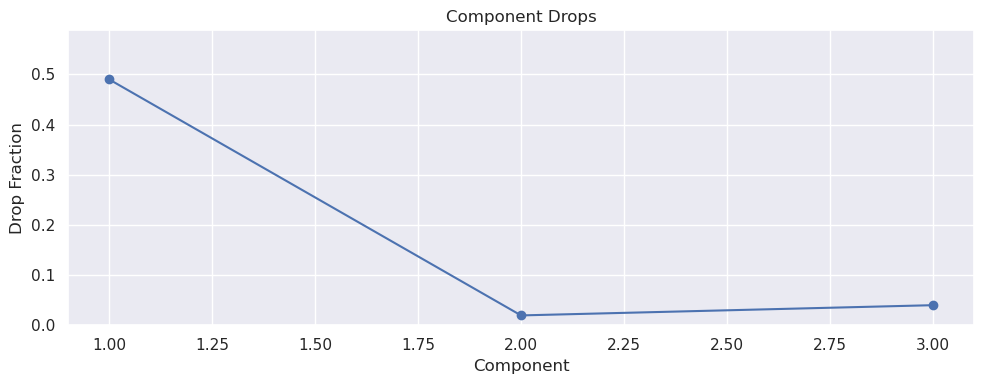

In [30]:
y = []
x = []
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    #print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    drop_lines = [line for line in lines if f"cpu_sim {i}" in line and "drop" in line]
    recd_lines = [line for line in lines if f"cpu_sim {i}" in line and "recd" in line]
    #print("Frames Recvd:",len(recd_lines))
    #print("Frames Dropped:",len(drop_lines))
    d = len(drop_lines)
    r = len(recd_lines)
    #print("Drop frames fraction: ", d/r)
    x.append(component_id)
    y.append(d/r)
    
# Create a DataFrame
drops = pd.DataFrame({
    'component': x,
    'fraction': y
})
    
# Plot
plt.figure(figsize=(10, 4))
plt.plot(drops['component'], drops['fraction'], marker='o', linestyle='-')
plt.title(f"Component Drops")
plt.xlabel('Component')
plt.ylabel('Drop Fraction')
plt.ylim(0, max(drops['fraction']) * 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()


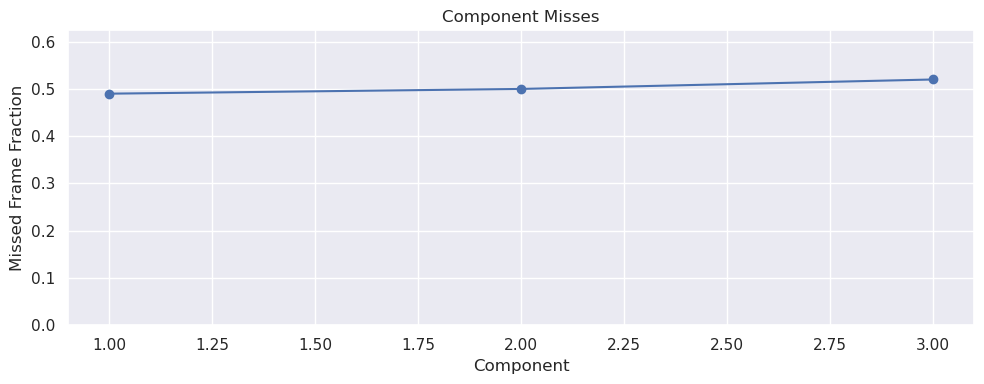

In [31]:
y = []
x = []
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    #print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    missed_lines = [line for line in lines if f"cpu_sim {i}" in line and "Missed frame ratio" in line]
    # Get the last match, if any
    if missed_lines:
        last_match = missed_lines[-1]
        #print("Last matching line:")
        #print(last_match)
    else:
        print(f"No matches found for '{search_string}'")

    match = re.search(r"Missed frame ratio: ([\d.]+)", last_match)
    if match:
        value = float(match.group(1))
        #print(value)
        y.append(value)
        x.append(component_id)
    else:
        print("No match in Missed line:", last_match)
        y.append(0)
        x.append(component_id)
    
# Create a DataFrame
misses = pd.DataFrame({
    'component': x,
    'fraction': y
})
    
# Plot
plt.figure(figsize=(10, 4))
plt.plot(misses['component'], misses['fraction'], marker='o', linestyle='-')
plt.title(f"Component Misses")
plt.xlabel('Component')
plt.ylabel('Missed Frame Fraction')
plt.ylim(0, max(misses['fraction']) * 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()

# Define the search term and file path
#search_string = "drop"
#file_path = "log.txt"  # replace with your file path

# Read and filter lines
#with open(file_path, 'r') as f:
#    matches = [line.strip() for line in f if search_string in line]

# Get the last match, if any
#if matches:
#    last_match = matches[-1]
#    print("Last matching line:")
#    print(last_match)
#else:
#    print(f"No matches found for '{search_string}'")


In [32]:
#drops

In [33]:
#drops['fraction'].sum()

In [34]:
#misses

In [35]:
#misses['fraction']-drops['fraction']


🔧 Component 1 (Port 6000):


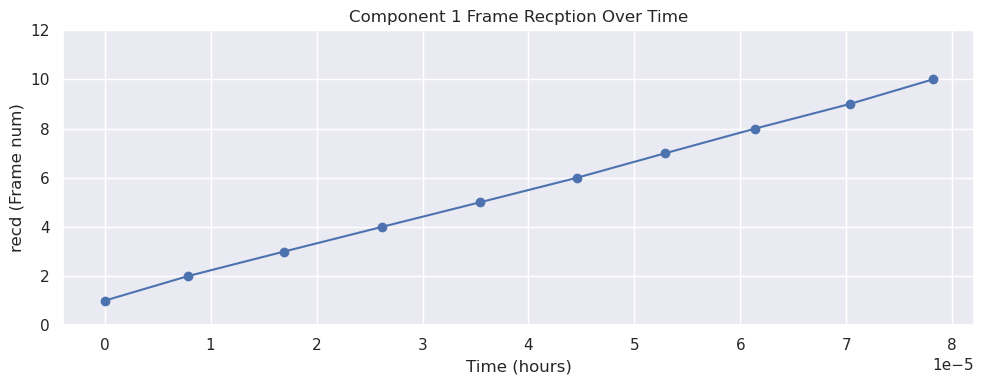


🔧 Component 2 (Port 6001):


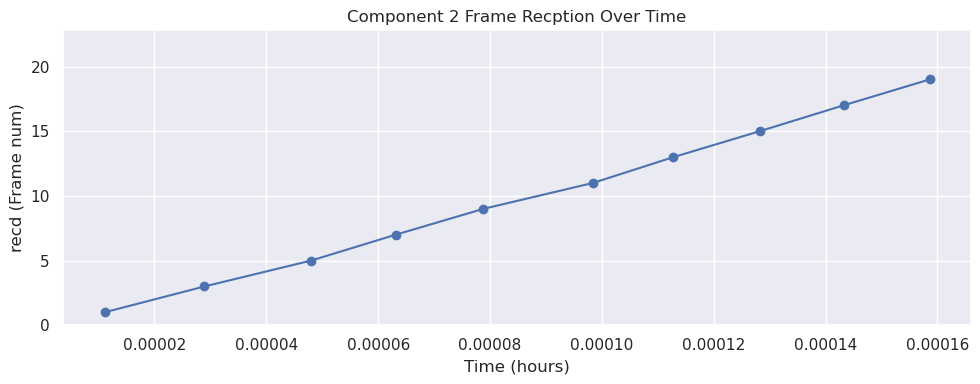


🔧 Component 3 (Port 6002):


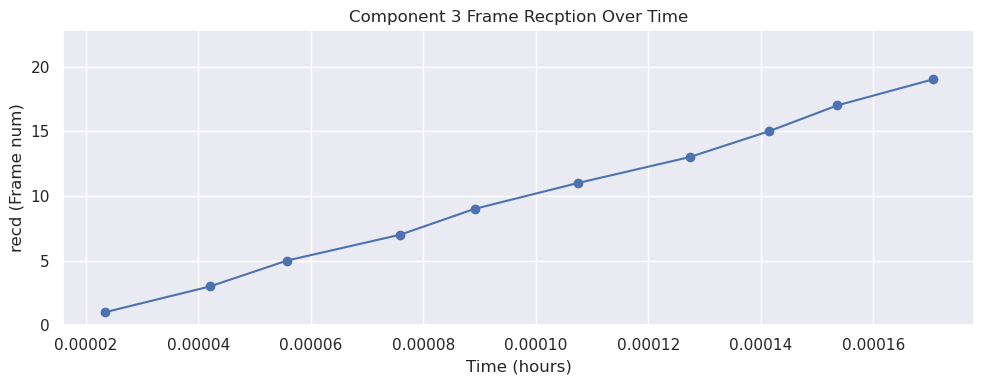

In [36]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    recd_lines = [line for line in lines if f"cpu_sim {i}" in line and "recd" in line]
    # Parse bit rate values and timestamps
    y = []
    x = []
    for line in recd_lines:
        match = re.search(r"recd ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            y.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            x.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in recd line:", line)
    
    # Create a DataFrame
    #print("len(lines)=",len(lines))
    #print("len(comp_lines)=",len(comp_lines))
    #print("len(x)=",len(x))
    recd = pd.DataFrame({
        'timestamp': x,
        'frame': y
    })
    # Convert microseconds to hours
    recd['hours'] = recd['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    #recd_stats = compute_moments(recd['frame'])
    
    # Display statistics
    #print(f"Component {component_id} Statistics (Hz):")
    
    #for k, v in recd_stats.items():
        #print(f"{k}: {v:.3f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(recd['hours'].head(10), recd['frame'].head(10), marker='o', linestyle='-')
    plt.title(f"Component {component_id} Frame Recption Over Time")
    plt.xlabel('Time (hours)')
    plt.ylabel('recd (Frame num)')
    plt.ylim(0, max(recd['frame'].head(10)) * 1.2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/scratch/slurm/51154007/.cache/tmp/ipykernel_659451/1114673558.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


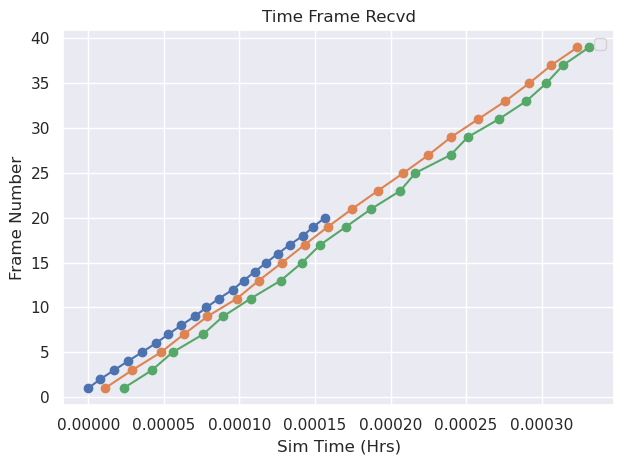

In [37]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    #print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    recd_lines = [line for line in lines if f"cpu_sim {i}" in line and "recd" in line]
    # Parse bit rate values and timestamps
    y = []
    x = []
    for line in recd_lines:
        match = re.search(r"recd ([\d.]+)", line)
        if match:
            value = float(match.group(1))
            y.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            x.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in recd line:", line)
    
    # Create a DataFrame
    recd = pd.DataFrame({
        'timestamp': x,
        'frame': y
    })
    # Convert microseconds to hours
    recd['hours'] = recd['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    #recd_stats = compute_moments(recd['frame'])
    
    # Display statistics
    #print(f"Component {component_id} Statistics (Hz):")
    
    #for k, v in recd_stats.items():
        #print(f"{k}: {v:.3f}")
    
    # Plot
    plt.plot(recd['hours'].head(20), recd['frame'].head(20), marker='o', linestyle='-')
    
# Add labels and legend
plt.xlabel('Sim Time (Hrs)')
plt.ylabel('Frame Number')
plt.title('Time Frame Recvd')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


/scratch/slurm/51154007/.cache/tmp/ipykernel_659451/3278626246.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


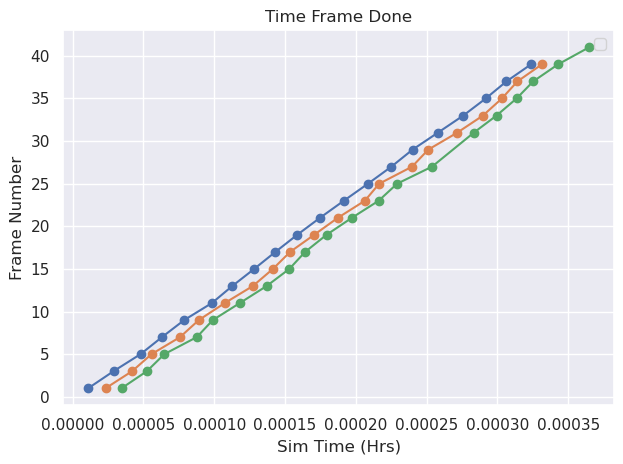

In [38]:
for i in range(base_port, hi_port + 1):
    component_id = i - base_port + 1
    #print(f"\n🔧 Component {component_id} (Port {i}):")
    # Filter lines for this component
    done_lines = [line for line in lines if f"cpu_sim {i}" in line and "done" in line]
    # Parse bit rate values and timestamps
    y = []
    x = []
    for line in done_lines:
        match = re.search(r"done (\([\d.]+\))", line)
        if match:
            #print(match.group(1))
            #print(match.group(1).strip("()"))
            value = float(match.group(1).strip("()"))
            #print(value)
            y.append(value)
            ts_match = re.match(r"([\d.]+)", line)
            x.append(ts_match.group(1) if ts_match else None)
        else:
            print("No match in done line:", line)
    
    # Create a DataFrame
    done = pd.DataFrame({
        'timestamp': x,
        'frame': y
    })
    # Convert microseconds to hours
    done['hours'] = done['timestamp'].astype(float) / 3_600_000_000
    
    # Compute statistics
    #recd_stats = compute_moments(recd['frame'])
    
    # Display statistics
    #print(f"Component {component_id} Statistics (Hz):")
    
    #for k, v in recd_stats.items():
        #print(f"{k}: {v:.3f}")
    
    # Plot
    plt.plot(done['hours'].head(20), done['frame'].head(20), marker='o', linestyle='-')
    
# Add labels and legend
plt.xlabel('Sim Time (Hrs)')
plt.ylabel('Frame Number')
plt.title('Time Frame Done')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
#import matplotlib.pyplot as plt

# Example data
#x = [0, 1, 2, 3, 4]
#y1 = [0, 1, 4, 9, 16]
#y2 = [0, 1, 2, 3, 4]
#y3 = [16, 9, 4, 1, 0]

# Plot each series with a label
#plt.plot(x, y1, label='y = x^2', color='blue')
#plt.plot(x, y2, label='y = x', color='green')
#plt.plot(x, y3, label='y = -x^2', color='red')

# Add labels and legend
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
#plt.title('Multiple Series on One Plot')
#plt.legend()

# Show grid and plot
#plt.grid(True)
#plt.tight_layout()
#plt.show()


In [40]:
#done.head(20)